# Changing raster extents and origin

- Map algebra on rasters require matching resolution, projection, origin and/or extent
- Usually alignment is done through resampling
- Can modify manually, eg. add/remove rows or change extents

In [20]:
from helpers import src_elev
import numpy as np
import geopandas as gpd
import rasterio
import rasterio.plot
import shapely
%matplotlib inline 
import matplotlib.pyplot as plt

In [13]:
r = src_elev.read(1)
r

array([[ 1,  2,  3,  4,  5,  6],
       [ 7,  8,  9, 10, 11, 12],
       [13, 14, 15, 16, 17, 18],
       [19, 20, 21, 22, 23, 24],
       [25, 26, 27, 28, 29, 30],
       [31, 32, 33, 34, 35, 36]], dtype=uint8)

In [14]:
rows, cols = 1, 2
r_pad = np.pad(r, ((rows, rows), (cols, cols)),
              constant_values=18)
r_pad

array([[18, 18, 18, 18, 18, 18, 18, 18, 18, 18],
       [18, 18,  1,  2,  3,  4,  5,  6, 18, 18],
       [18, 18,  7,  8,  9, 10, 11, 12, 18, 18],
       [18, 18, 13, 14, 15, 16, 17, 18, 18, 18],
       [18, 18, 19, 20, 21, 22, 23, 24, 18, 18],
       [18, 18, 25, 26, 27, 28, 29, 30, 18, 18],
       [18, 18, 31, 32, 33, 34, 35, 36, 18, 18],
       [18, 18, 18, 18, 18, 18, 18, 18, 18, 18]], dtype=uint8)

>Padding changes the origin, so the transformation matrix needs to be modified.
>
>Transformation matrix in `.transform`

In [23]:
src_elev.transform

Affine(0.5, 0.0, -1.5,
       0.0, -0.5, 1.5)

>Get the origin and resolution (dist btwn pixels)

In [24]:
xmin, ymax = src_elev.transform[2], src_elev.transform[5]
xmin, ymax

(-1.5, 1.5)

In [25]:
dx, dy = src_elev.transform[0], src_elev.transform[4]
dx, dy

(0.5, -0.5)

In [27]:
xmin_new = xmin - dx * cols 
ymax_new = ymax - dy * rows 
xmin_new, ymax_new

(-2.5, 2.0)

In [28]:
new_transform = rasterio.transform.from_origin(
    west=xmin_new, 
    north=ymax_new, 
    xsize=dx, 
    ysize=abs(dy)
)
new_transform

Affine(0.5, 0.0, -2.5,
       0.0, -0.5, 2.0)

In [30]:
elev_bbox = gpd.GeoSeries(shapely.box(*src_elev.bounds))
elev_bbox

0    POLYGON ((1.5 -1.5, 1.5 1.5, -1.5 1.5, -1.5 -1...
dtype: geometry

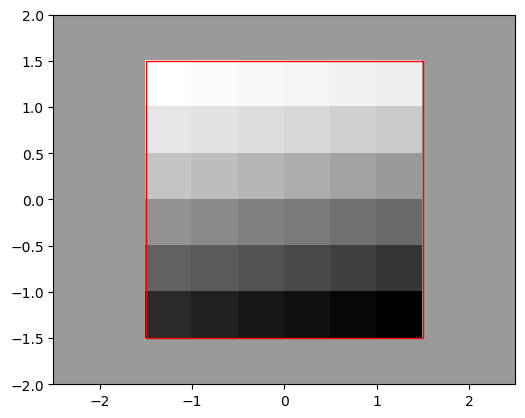

In [31]:
fig, ax = plt.subplots()
rasterio.plot.show(r_pad, transform=new_transform, cmap='Greys', ax=ax)
elev_bbox.plot(color='none', ec='r', ax=ax);

>Manually shift origin
>
>shift elev.tif by (-0.25,0.25)

In [32]:
xmin_new = xmin - 0.25
ymax_new = ymax + 0.25
xmin_new, ymax_new

(-1.75, 1.75)

In [33]:
new_transform = rasterio.transform.from_origin(
    west=xmin_new, 
    north=ymax_new, 
    xsize=dx, 
    ysize=abs(dy)
)
new_transform

Affine(0.5, 0.0, -1.75,
       0.0, -0.5, 1.75)

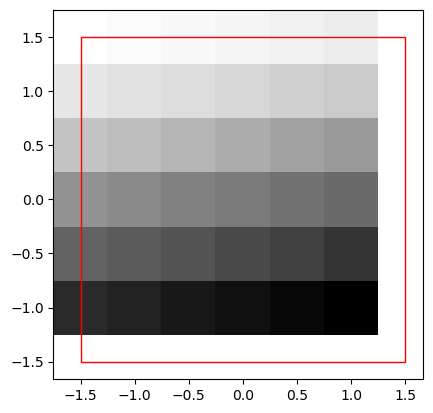

In [34]:
fig, ax = plt.subplots()
rasterio.plot.show(r, transform=new_transform, cmap='Greys', ax=ax)
elev_bbox.plot(color='none', ec='r', ax=ax);